<a href="https://colab.research.google.com/github/ab17254/ce888/blob/main/Assignment/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [77]:
!unzip /content/data.zip

Archive:  /content/data.zip
replace content/data/arrest_london.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: content/data/arrest_london.csv  
  inflating: content/data/arrest_all.csv  
  inflating: content/data/arrest_essex.csv  
  inflating: content/data/arrest_manchester.csv  
  inflating: content/data/arrest_lancashire.csv  
  inflating: content/data/arrest_suffolk.csv  
  inflating: content/data/arrest_wiltshire.csv  
  inflating: content/data/data_all.csv  


In [80]:
df = pd.read_csv('/content/content/data/data_all.csv')
df

,Unnamed: 0,Time,All,Asian,Black,Mixed,Other,White,Asian Officers,Black Officers,Mixed Officers,Other Officers,White Officers
0,0,2006/07,31.376667,17.333333,60.00,31.8,24.0,23.75,"2,111","1,350","1,419",632,"134,372"
1,1,2007/08,33.060000,19.000000,62.75,31.8,26.0,25.75,"2,231","1,371","1,525",656,"134,000"
2,2,2008/09,33.770000,20.000000,65.00,31.6,25.5,26.75,"2,472","1,427","1,699",689,"135,651"
3,3,2009/10,33.503333,19.666667,65.25,31.6,24.5,26.50,"2,607","1,446","1,844",745,"135,293"
4,4,2010/11,33.706667,19.833333,66.75,32.2,24.0,25.75,"2,582","1,442","1,838",754,"130,870"
5,5,2011/12,30.876667,17.833333,61.00,29.8,22.0,23.75,"2,607","1,420","1,871",766,"125,579"
6,6,2012/13,27.226667,15.833333,52.75,25.8,20.0,21.75,"2,563","1,361","1,865",749,"121,086"
7,7,2013/14,26.436667,15.833333,51.75,24.6,19.0,21.00,"2,665","1,352","1,922",776,"119,071"
8,8,2014/15,24.833333,14.666667,49.75,23.0,18.0,18.75,"2,795","1,373","2,028",785,"117,757"
9,9,2015/16,23.770000,14.000000,48.50,21.6,18.0,16.75,"2,881","1,433","2,096",808,"114,437"


In [83]:
data=df.values.T[8]

In [84]:
data

array(['2,111', '2,231', '2,472', '2,607', '2,582', '2,607', '2,563',
       '2,665', '2,795', '2,881', '3,104', '3,266'], dtype=object)

In [14]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
  samples = np.zeros((n_bootstraps, sample_size))
  for i in range(n_bootstraps):
    samples[i] = np.random.choice(sample, sample_size, replace=True)
  data_mean = np.mean(samples)
  n_mean = np.mean(samples, axis=1)
  lower, upper = np.percentile(n_mean, [((100-ci)/2), (100 - (100-ci)/2)])
  return data_mean, lower, upper

In [ ]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

In [55]:
df.describe()

,All,Asian,Black,Mixed,Other,White
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,28.271111,16.472222,55.645833,26.800000,20.916667,21.520833
std,5.138060,2.970251,8.951548,5.281873,3.970535,4.739172
min,19.413333,11.166667,40.500000,18.400000,14.000000,13.000000
25%,24.567500,14.500000,49.437500,22.650000,18.000000,18.250000
50%,29.051667,16.583333,56.375000,27.800000,21.000000,22.750000
75%,33.170833,19.166667,63.312500,31.650000,24.125000,25.750000
max,33.770000,20.000000,66.750000,32.200000,26.000000,26.750000


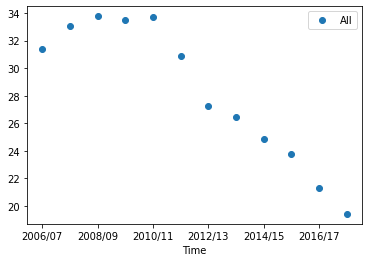

In [56]:
df.plot(x='Time',y='All', style='o')
plt.show()

In [66]:
df['Time'] = df['Time'].str[:-3]

In [67]:
df

,Time,All,Asian,Black,Mixed,Other,White
0,2006,31.376667,17.333333,60.00,31.8,24.0,23.75
1,2007,33.060000,19.000000,62.75,31.8,26.0,25.75
2,2008,33.770000,20.000000,65.00,31.6,25.5,26.75
3,2009,33.503333,19.666667,65.25,31.6,24.5,26.50
4,2010,33.706667,19.833333,66.75,32.2,24.0,25.75
5,2011,30.876667,17.833333,61.00,29.8,22.0,23.75
6,2012,27.226667,15.833333,52.75,25.8,20.0,21.75
7,2013,26.436667,15.833333,51.75,24.6,19.0,21.00
8,2014,24.833333,14.666667,49.75,23.0,18.0,18.75
9,2015,23.770000,14.000000,48.50,21.6,18.0,16.75


In [68]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [70]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
print(regressor.intercept_)
print(regressor.coef_)

-1.1119993814645568e-12
[5.42205591e-16 1.00000000e+00 1.35169653e-14 2.44249065e-15
 6.93889390e-15 3.94129174e-15]


In [73]:
y_pred = regressor.predict(X_test)

In [74]:
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dataset

,Actual,Predicted
0,27.226667,27.226667
1,19.413333,19.413333
2,33.706667,33.706667


In [75]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.736951571734001e-15
Mean Squared Error: 3.3658065289429835e-29
Root Mean Squared Error: 5.801557143511545e-15
